# Table of Contents

# Sources

<b>Import Export Data Source</b>: http://www.sais-cari.org/data-chinese-foreign-aid-to-africa
<br>
<br><b>Source</b>: Johns Hopkins University’s China Africa Research Initiative 

## Information about the data
#### Column names and descriptions

Import CSVs (China and US)
* **Year** - unique identified for a house
* **Country** - Date house was sold
* **Imports** - Price is prediction target

Export CSVs (China and US)
* **Year** - unique identified for a house
* **Country** - Date house was sold
* **Exports** - Price is prediction target


## Import the necessary packages

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings as w
import matplotlib.pyplot as plt
import missingno as msno

# Data Import <a class="anchor" id="Data_Cleaning"></a>

In [3]:
%autosave 10

Autosaving every 10 seconds


## Extract US and China Data 

Extracted US and Chinese Import and Export Data from Africa from a XLSX file. Parsed the dates, removed excess colums and rows, and dropped extra columns and rows, in a previous notebook. The excel data was outputed as CSVs.

### File Descriptions:

* Exp_US_Final.csv - US Exports to Africa 1992-2018
* Imp_US_final.csv - US Imports from Africa 1992-2018

* Exp_ZH_final.csv - Chinese Exports from Africa 1992-2018
* Imp_ZH_final.csv - Chinese Imports from Africa 1992-2018

In [4]:
#Read US-African Import Data 1992-2018
US_Imp = pd.read_csv('Imp_US_final​.csv', parse_dates=['Year'])
US_Imp['Year'] = pd.DatetimeIndex(US_Imp['Year']).year
US_Imp = US_Imp.drop(['Unnamed: 0'], axis=1)


#Read US-African Export Data 1992-2018
US_Exp = pd.read_csv('Exp_US_Final.csv', parse_dates=['Year'])
US_Exp['Year'] = pd.DatetimeIndex(US_Exp['Year']).year
US_Exp = US_Exp.drop(['Unnamed: 0'], axis=1)


#Read Chinese-African Import Data 1992-2018
ZH_Imp = pd.read_csv('Imp_ZH_final.csv', parse_dates=['Year'])
ZH_Imp['Year'] = pd.DatetimeIndex(ZH_Imp['Year']).year
ZH_Imp = ZH_Imp.drop(['Unnamed: 0'], axis=1)


#Read Chinese-African Export Data 1992-2018
ZH_Exp = pd.read_csv('Exp_ZH_final.csv', parse_dates=['Year'])
ZH_Exp['Year'] = pd.DatetimeIndex(ZH_Exp['Year']).year
ZH_Exp = ZH_Exp.drop(['Unnamed: 0'], axis=1)


## Check the distributions

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Export'}>]], dtype=object)

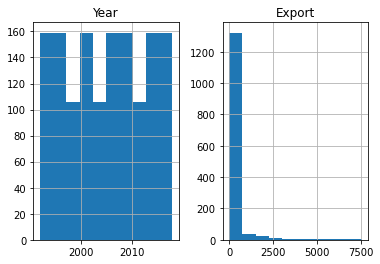

In [5]:
US_Exp.hist()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Import'}>]], dtype=object)

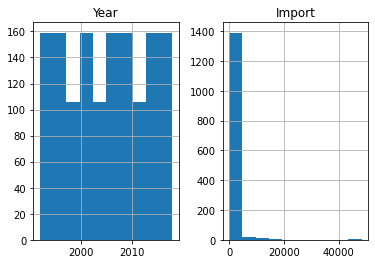

In [6]:
US_Imp.hist()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Export'}>]], dtype=object)

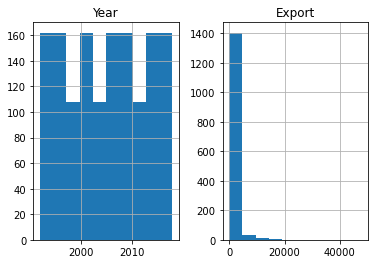

In [7]:
ZH_Exp.hist()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Import'}>]], dtype=object)

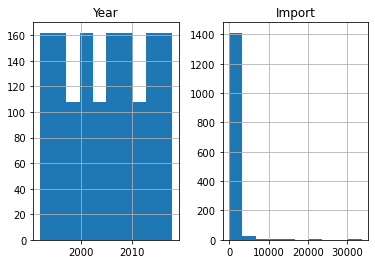

In [8]:
ZH_Imp.hist()

## UN Regions for Africa

Create distinct lists for each African country region based off of United Nations naming scheme for African regions. 

In [9]:
North_Africa = ['Algeria','Canary Islands', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia']
E_Africa = [ 'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 
            'Mozambique', 'Reunion', 'Rwanda', 'Seychelles', 'Somalia',  'South Sudan', 'Uganda', 
            'Tanzania', 'Zambia', 'Zimbabwe']

Middle_Africa = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo','Dem. Rep. of the Congo',
                 'Equatorial Guinea','Gabon', 'Sao Tome and Principe']

W_Africa = ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire",'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
            'Liberia','Mali', 'Mauritania', 'Niger', 'Nigeria', 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo']

S_Africa = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa']

regions = ['North_Africa', 'East Africa', 'Central Africa', 'West Africa', 'Southern Africa' ]
region_list = [North_Africa, E_Africa, Middle_Africa, W_Africa, S_Africa]
african_dict = dict(zip(regions, region_list))

Function to classify countries in import and export data sets by UN regions. 

In [10]:
def region(c):
    """This will take data from the JHU Data set, and classify UN Regions based off each country name"""
    if c['Country'] in North_Africa:
        return 'North Africa'
    elif c['Country'] in E_Africa:
        return 'East Africa'
    elif c['Country'] in Middle_Africa:
        return 'Middle Africa'
    elif c['Country'] in W_Africa:
        return 'West Africa'
    elif c['Country'] in S_Africa:
        return 'South Africa'
    else:
        return 'None'

# Data Cleaning

In [11]:
display(US_Exp.head())
print('\n')
display(ZH_Exp.head())
print('\n')
display(US_Imp.head())
print('\n')
display(ZH_Imp.head())
print('\n')

,Year,Country,Export
0,1992,Algeria,0.0
1,1993,Algeria,0.0
2,1994,Algeria,0.0
3,1995,Algeria,0.0
4,1996,Algeria,0.0


,Year,Country,Export
0,1992,Algeria,27.338317
1,1993,Algeria,33.538298
2,1994,Algeria,59.800433
3,1995,Algeria,57.494371
4,1996,Algeria,54.497403


,Year,Country,Import
0,1992,Algeria,0.0
1,1993,Algeria,0.0
2,1994,Algeria,0.0
3,1995,Algeria,0.0
4,1996,Algeria,0.0


,Year,Country,Import
0,1992,Algeria,2.696153
1,1993,Algeria,6.647521
2,1994,Algeria,3.768851
3,1995,Algeria,22.027415
4,1996,Algeria,0.011424


## Chinese African Exports 1992 - 2018

In [12]:
ZH_Exp.head(10)

,Year,Country,Export
0,1992,Algeria,27.338317
1,1993,Algeria,33.538298
2,1994,Algeria,59.800433
3,1995,Algeria,57.494371
4,1996,Algeria,54.497403
5,1997,Algeria,112.960682
6,1998,Algeria,116.785836
7,1999,Algeria,159.952713
8,2000,Algeria,172.916756
9,2001,Algeria,222.226410


In [13]:
#Convert to Billions of $USD from millions
ZH_Exp['Export']= ZH_Exp['Export']*(0.001)

In [14]:
ZH_Exp['Export'].describe()

count    1458.000000
mean        0.756276
std         2.280913
min         0.000000
25%         0.012320
50%         0.072858
75%         0.449994
max        47.834308
Name: Export, dtype: float64

In [15]:
ZH_Exp.groupby('Country')['Export'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Algeria,27.0,2.750701,2.930693,0.027338,0.138369,1.404420,4.944270,7.923382
Angola,27.0,1.375203,1.664715,0.008473,0.031432,0.372794,2.321707,5.975307
Benin,27.0,1.289730,1.146735,0.022190,0.158186,0.952952,2.212181,3.485979
Botswana,27.0,0.116018,0.145184,0.000000,0.000000,0.058513,0.179135,0.616162
Burkina Faso,27.0,0.048033,0.061564,0.000771,0.003509,0.016135,0.064062,0.223341
Burundi,27.0,0.018933,0.019307,0.000387,0.002435,0.010179,0.038496,0.051602
Cabo Verde,27.0,0.022170,0.025749,0.000161,0.001900,0.005188,0.045986,0.078050
Cameroon,27.0,0.523219,0.671423,0.005425,0.019520,0.129873,0.969214,1.877425
Central African Rep.,27.0,0.007062,0.006889,0.000161,0.000996,0.003324,0.012847,0.022857


In [16]:
ZH_Exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     1458 non-null   int64  
 1   Country  1458 non-null   object 
 2   Export   1458 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 34.3+ KB


<AxesSubplot:>

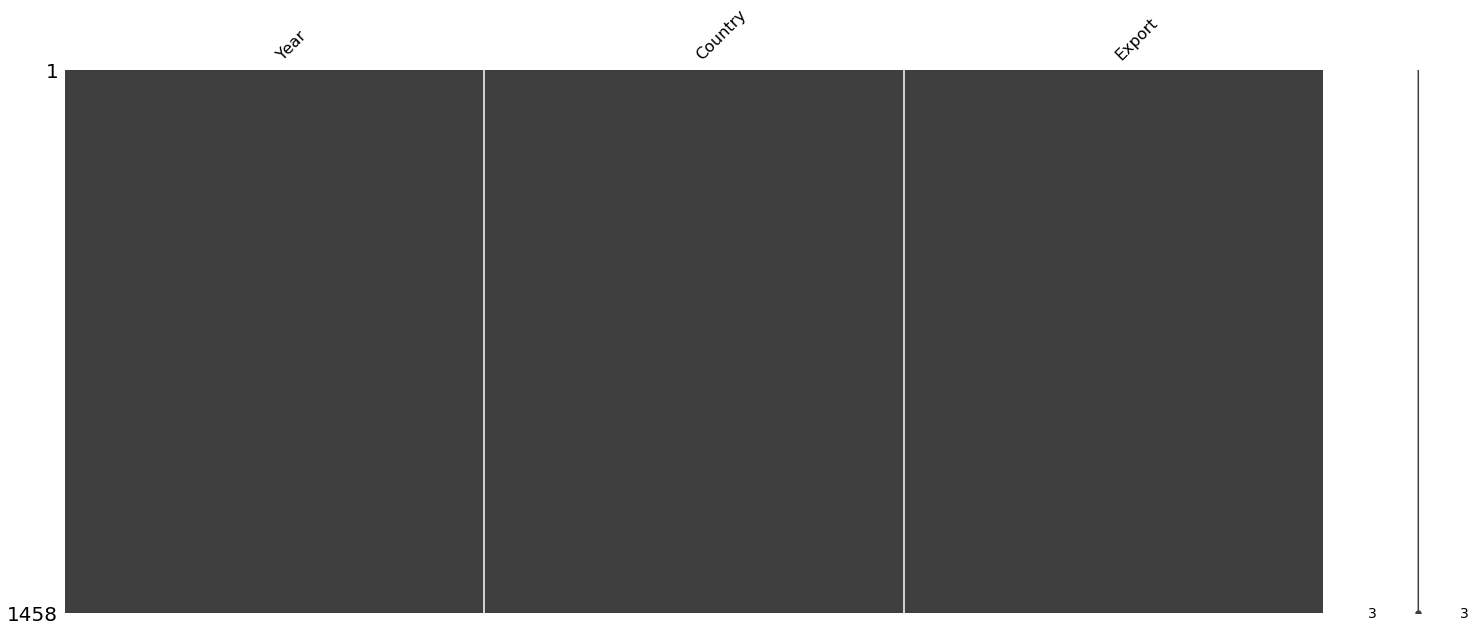

In [17]:
#Check for Missing Values in Chinese Exports 
msno.matrix(ZH_Exp)


### Classifying Region using Country

In [18]:
ZH_Exp['Region'] = ZH_Exp.apply(region, axis = 1)
ZH_Exp

,Year,Country,Export,Region
0,1992,Algeria,0.027338,North Africa
1,1993,Algeria,0.033538,North Africa
2,1994,Algeria,0.059800,North Africa
3,1995,Algeria,0.057494,North Africa
4,1996,Algeria,0.054497,North Africa
...,...,...,...,...
1453,2014,Zimbabwe,0.403801,East Africa
1454,2015,Zimbabwe,0.543323,East Africa
1455,2016,Zimbabwe,0.387485,East Africa
1456,2017,Zimbabwe,0.443819,East Africa


In [19]:
ZH_Exp.groupby('Year')['Export'].sum()

Year
1992      1.257614
1993      1.249943
1994      1.348419
1995      1.820920
1996      1.843160
1997      2.383242
1998      3.131077
1999      3.199387
2000      5.007118
2001      5.959777
2002      6.918367
2003     10.124757
2004     13.729951
2005     18.602937
2006     26.583923
2007     37.373321
2008     51.089013
2009     47.635112
2010     59.807450
2011     72.919404
2012     85.133662
2013     92.570973
2014    105.832840
2015    155.695569
2016     91.984609
2017     94.499205
2018    104.949329
Name: Export, dtype: float64

In [20]:
ZH_Exp.pivot_table(values = 'Export', index ='Year')

,Export
Year,
1992,0.023289
1993,0.023147
1994,0.024971
1995,0.033721
1996,0.034133
1997,0.044134
1998,0.057983
1999,0.059248
2000,0.092724


### Pivoted Chinese Export Data

In [21]:
ZH_Exp.pivot_table(values = 'Export', index ='Year', columns = 'Country')


Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,Somalia,South Africa,South Sudan,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.027338,0.008473,0.022190,0.000000,0.002500,0.003601,0.000161,0.009591,0.000161,0.000624,...,0.005238,0.000000,0.000000,0.000000,0.075323,0.028495,0.007097,0.107981,0.005372,0.027430
1993,0.033538,0.011207,0.053613,0.000000,0.009382,0.003711,0.000755,0.006415,0.003217,0.000186,...,0.000670,0.000000,0.000000,0.000000,0.108965,0.028401,0.006235,0.039508,0.007210,0.008746
1994,0.059800,0.012482,0.030440,0.000000,0.000984,0.002643,0.000424,0.005425,0.000199,0.001415,...,0.001779,0.000000,0.000000,0.000000,0.097346,0.050498,0.008725,0.065598,0.009698,0.021635
1995,0.057494,0.021159,0.066516,0.000000,0.001579,0.002122,0.000380,0.010118,0.000984,0.002377,...,0.000312,0.000000,0.000000,0.000000,0.119797,0.036270,0.012838,0.074111,0.019647,0.015285
1996,0.054497,0.028534,0.069882,0.000000,0.000771,0.000913,0.000275,0.010902,0.002277,0.001167,...,0.000459,0.000000,0.000000,0.000000,0.078571,0.060645,0.007953,0.064154,0.009710,0.018845
1997,0.112961,0.029129,0.109725,0.000000,0.001570,0.000387,0.000405,0.012545,0.000835,0.001030,...,0.000477,0.000000,0.000000,0.000000,0.069248,0.074649,0.009928,0.084882,0.010683,0.028174
1998,0.116786,0.036653,0.153539,0.000000,0.005135,0.002086,0.001961,0.018905,0.001059,0.000152,...,0.000178,0.000000,0.000000,0.000000,0.059081,0.083977,0.010779,0.069973,0.022116,0.104776
1999,0.159953,0.016364,0.162833,0.000000,0.001376,0.001460,0.003141,0.020136,0.001008,0.000239,...,0.000487,0.000000,0.000000,0.000000,0.070269,0.097359,0.010632,0.063928,0.008382,0.027244
2000,0.172917,0.033736,0.370412,0.011474,0.002958,0.003627,0.005178,0.022633,0.000343,0.000622,...,0.000997,1.013646,0.000000,0.000000,0.080370,0.096722,0.014404,0.085763,0.032862,0.031916


### Adding Columns and Cleaning Pivoted Data

Added percentage change per year, and added totals for each year. 

In [22]:
ZH_Exp_Pivot = ZH_Exp.pivot_table(values = 'Export', index ='Year', columns = 'Country')
ZH_Exp_Pivot['Year_Total'] = ZH_Exp_Pivot.sum(axis=1)
ZH_Exp_Pivot['Percentage Change'] = ZH_Exp_Pivot['Year_Total'].pct_change()*100
ZH_Exp_Pivot = ZH_Exp_Pivot.fillna(0)
ZH_Exp_Pivot

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,South Sudan,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,Year_Total,Percentage Change
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.027338,0.008473,0.022190,0.000000,0.002500,0.003601,0.000161,0.009591,0.000161,0.000624,...,0.000000,0.000000,0.075323,0.028495,0.007097,0.107981,0.005372,0.027430,1.257614,0.000000
1993,0.033538,0.011207,0.053613,0.000000,0.009382,0.003711,0.000755,0.006415,0.003217,0.000186,...,0.000000,0.000000,0.108965,0.028401,0.006235,0.039508,0.007210,0.008746,1.249943,-0.609953
1994,0.059800,0.012482,0.030440,0.000000,0.000984,0.002643,0.000424,0.005425,0.000199,0.001415,...,0.000000,0.000000,0.097346,0.050498,0.008725,0.065598,0.009698,0.021635,1.348419,7.878406
1995,0.057494,0.021159,0.066516,0.000000,0.001579,0.002122,0.000380,0.010118,0.000984,0.002377,...,0.000000,0.000000,0.119797,0.036270,0.012838,0.074111,0.019647,0.015285,1.820920,35.041108
1996,0.054497,0.028534,0.069882,0.000000,0.000771,0.000913,0.000275,0.010902,0.002277,0.001167,...,0.000000,0.000000,0.078571,0.060645,0.007953,0.064154,0.009710,0.018845,1.843160,1.221362
1997,0.112961,0.029129,0.109725,0.000000,0.001570,0.000387,0.000405,0.012545,0.000835,0.001030,...,0.000000,0.000000,0.069248,0.074649,0.009928,0.084882,0.010683,0.028174,2.383242,29.301949
1998,0.116786,0.036653,0.153539,0.000000,0.005135,0.002086,0.001961,0.018905,0.001059,0.000152,...,0.000000,0.000000,0.059081,0.083977,0.010779,0.069973,0.022116,0.104776,3.131077,31.378914
1999,0.159953,0.016364,0.162833,0.000000,0.001376,0.001460,0.003141,0.020136,0.001008,0.000239,...,0.000000,0.000000,0.070269,0.097359,0.010632,0.063928,0.008382,0.027244,3.199387,2.181695
2000,0.172917,0.033736,0.370412,0.011474,0.002958,0.003627,0.005178,0.022633,0.000343,0.000622,...,0.000000,0.000000,0.080370,0.096722,0.014404,0.085763,0.032862,0.031916,5.007118,56.502390


## Chinese African Imports 1992 - 2018

In [23]:
ZH_Imp.head()


,Year,Country,Import
0,1992,Algeria,2.696153
1,1993,Algeria,6.647521
2,1994,Algeria,3.768851
3,1995,Algeria,22.027415
4,1996,Algeria,0.011424


### Classify Regions

In [24]:
ZH_Imp['Region'] = ZH_Imp.apply(region, axis = 1)
ZH_Imp

,Year,Country,Import,Region
0,1992,Algeria,2.696153,North Africa
1,1993,Algeria,6.647521,North Africa
2,1994,Algeria,3.768851,North Africa
3,1995,Algeria,22.027415,North Africa
4,1996,Algeria,0.011424,North Africa
...,...,...,...,...
1453,2014,Zimbabwe,836.633090,East Africa
1454,2015,Zimbabwe,761.400853,East Africa
1455,2016,Zimbabwe,726.879971,East Africa
1456,2017,Zimbabwe,872.029644,East Africa


### Convert Import Values from Millions to Billions

In [25]:
#Convert Chinese Imports from Millions to Billions of Dollars, $USD
ZH_Imp['Import']= ZH_Imp['Import']*(0.001)

### Pivoted Chinese Import Data 

In [26]:
#Set pivot table index and countries as column. Fill data with import data. 
ZH_Imp_Pivot = ZH_Imp.pivot_table(values = 'Import', index ='Year', columns = 'Country')

In [27]:
#Add Total Amount Spent per Year column and YoY change column 
ZH_Imp_Pivot['Year_Total'] = ZH_Imp_Pivot.sum(axis=1)
ZH_Imp_Pivot['Percentage Change'] = ZH_Imp_Pivot['Year_Total'].pct_change()*100
ZH_Imp_Pivot = ZH_Imp_Pivot.fillna(0)
ZH_Imp_Pivot

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,South Sudan,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,Year_Total,Percentage Change
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.002696,0.029409,0.000546,0.000000,1.277821e-02,0.000021,0.000000e+00,0.016042,0.000009,0.000856,...,0.000000,0.000000,0.001657,0.023396,0.000002,0.000701,0.016247,0.097904,0.491274,0.000000
1993,0.006648,0.180710,0.000008,0.000000,6.460000e-07,0.000049,0.000000e+00,0.000077,0.000058,0.000011,...,0.000000,0.000000,0.000980,0.030042,0.000013,0.001150,0.010965,0.051316,0.583150,18.701563
1994,0.003769,0.047984,0.000474,0.000000,0.000000e+00,0.000054,0.000000e+00,0.009138,0.000169,0.000003,...,0.000000,0.000000,0.001716,0.012292,0.000021,0.009225,0.002111,0.026183,0.353099,-39.449733
1995,0.022027,0.136907,0.006120,0.000000,0.000000e+00,0.000008,0.000000e+00,0.027569,0.000162,0.001187,...,0.000000,0.000000,0.000595,0.035607,0.000011,0.009599,0.001821,0.036905,0.733267,107.666345
1996,0.000011,0.243751,0.001961,0.000000,0.000000e+00,0.000002,0.000000e+00,0.035030,0.002849,0.000497,...,0.000000,0.000000,0.001823,0.032317,0.001248,0.019435,0.005739,0.068462,0.792383,8.062016
1997,0.000018,0.603496,0.008779,0.000000,1.811280e-04,0.000000,0.000000e+00,0.098375,0.001078,0.001598,...,0.000000,0.000000,0.007801,0.022642,0.001740,0.017622,0.026506,0.074590,1.667083,110.388438
1998,0.000124,0.153698,0.003490,0.000000,4.258755e-03,0.000000,0.000000e+00,0.048646,0.000010,0.000000,...,0.000000,0.000000,0.003143,0.045789,0.000134,0.009687,0.006218,0.027867,0.777662,-53.351932
1999,0.062194,0.355651,0.002422,0.000000,1.997249e-03,0.000000,0.000000e+00,0.076314,0.000000,0.000000,...,0.000000,0.000000,0.000063,0.028387,0.000200,0.005744,0.017623,0.044340,1.510586,94.247154
2000,0.025938,1.842693,0.001125,0.000010,0.000000e+00,0.001119,0.000000e+00,0.138028,0.000301,0.000014,...,0.000000,0.000000,0.000062,0.002193,0.000837,0.004770,0.069390,0.102737,4.852662,221.243690


## US African Exports 1992 - 2018

In [28]:
US_Exp.head()

,Year,Country,Export
0,1992,Algeria,0.0
1,1993,Algeria,0.0
2,1994,Algeria,0.0
3,1995,Algeria,0.0
4,1996,Algeria,0.0


In [29]:
US_Exp['Region'] = US_Exp.apply(region, axis = 1)

In [30]:
#Convert to Billions of $USD from millions
US_Exp['Export']= US_Exp['Export']*(0.001)
US_Exp

,Year,Country,Export,Region
0,1992,Algeria,0.000000,North Africa
1,1993,Algeria,0.000000,North Africa
2,1994,Algeria,0.000000,North Africa
3,1995,Algeria,0.000000,North Africa
4,1996,Algeria,0.000000,North Africa
...,...,...,...,...
1426,2014,Zimbabwe,0.048699,East Africa
1427,2015,Zimbabwe,0.037835,East Africa
1428,2016,Zimbabwe,0.030060,East Africa
1429,2017,Zimbabwe,0.039926,East Africa


In [31]:
US_Exp_Pivot = US_Exp.pivot_table(values = 'Export', index ='Year', columns = 'Country')
US_Exp_Pivot.head(20)

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,South Africa,South Sudan,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,eSwatini
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
US_Exp_Pivot['Year_Total'] = US_Exp_Pivot.sum(axis=1)
#convert decimal percentage to numbers 
US_Exp_Pivot['Percentage Change'] = US_Exp_Pivot['Year_Total'].pct_change()*100 
#convert inf to NaN and fill the Nan values
US_Exp_Pivot= US_Exp_Pivot.replace([np.inf, -np.inf], np.nan).fillna(0) 
US_Exp_Pivot = US_Exp_Pivot.fillna(0)
US_Exp_Pivot

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,eSwatini,Year_Total,Percentage Change
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## US African Imports 1992 - 2018

In [33]:
US_Imp.head()

,Year,Country,Import
0,1992,Algeria,0.0
1,1993,Algeria,0.0
2,1994,Algeria,0.0
3,1995,Algeria,0.0
4,1996,Algeria,0.0


In [34]:
US_Imp['Region'] = US_Imp.apply(region, axis = 1)

In [35]:
#Convert to Billions of $USD from millions
US_Imp['Import']= US_Imp['Import']*(0.001)

In [36]:
US_Imp

,Year,Country,Import,Region
0,1992,Algeria,0.000000,North Africa
1,1993,Algeria,0.000000,North Africa
2,1994,Algeria,0.000000,North Africa
3,1995,Algeria,0.000000,North Africa
4,1996,Algeria,0.000000,North Africa
...,...,...,...,...
1426,2014,Zimbabwe,0.836633,East Africa
1427,2015,Zimbabwe,0.069000,East Africa
1428,2016,Zimbabwe,0.024407,East Africa
1429,2017,Zimbabwe,0.048446,East Africa


In [37]:
US_Imp_Pivot = US_Imp.pivot_table(values = 'Import', index ='Year', columns = 'Country')
US_Imp_Pivot.head(15)

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,South Africa,South Sudan,Sudan,Swaziland,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
US_Imp_Pivot['Year_Total'] = US_Imp_Pivot.sum(axis=1)
US_Imp_Pivot['Percentage Change'] = US_Imp_Pivot.loc[:,'Year_Total'].pct_change()*100

#change all inf to NaN, then change all NaN to zero. 
US_Imp_Pivot= US_Imp_Pivot.replace([np.inf, -np.inf], np.nan).fillna(0) #convert inf to NaN
US_Imp_Pivot

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,Sudan,Swaziland,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,Year_Total,Percentage Change
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Exploratory Data Analysis

File Names:
<ul>
    <li>ZH_Exp_Pivot - Chinese Exports to Africa</li>
    <li>ZH_Imp_Pivot - Chinese Imports to Africa</li>
    <li>US_Exp_Pivot - US Exports to Africa</li>
    <li>US_Imp_Pivot - US Imports to Africa</li>
</ul>

## China Import and Export Data

To get a better sense of Chinese Exports and Imports, we need to first examine which countries have the highest mean exports. The mean exports would give us a better sense of which countries have been trading with China consistently over time. 

### Export Data

FInd the top exports by country. 

#### Top 10 Countries by Avg. Chinese Exports 1992- 2008

In [39]:
ZH_avg_exp= ZH_Exp.groupby('Country')['Export'].mean().sort_values(ascending= False).head(10)
display(ZH_avg_exp)

Country
South Africa    6.416476
Egypt           5.504359
Nigeria         4.837566
Algeria         2.750701
Ghana           1.679614
Kenya           1.596961
Morocco         1.513096
Angola          1.375203
Ethiopia        1.312546
Benin           1.289730
Name: Export, dtype: float64

These countries list the highest average exports. The top 5 countries that China has exported in large amounts from 1992 to 2008 years are: South Africa, Egypt, Algeria, Ghana, and Kenya. 

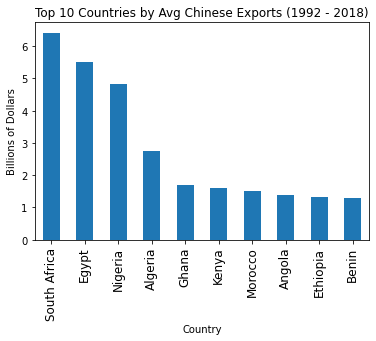

<Figure size 576x1080 with 0 Axes>

In [40]:
ZH_avg_exp.plot(kind="bar", title = 'Top 10 Countries by Avg Chinese Exports (1992 - 2018)')
plt.ylabel('Billions of Dollars')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.figure(figsize=(8,15))
plt.show()

#### Top 10 African Export Countries by Year

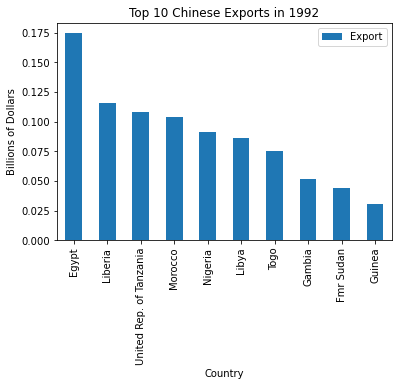

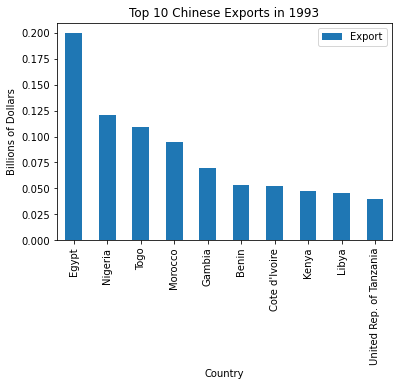

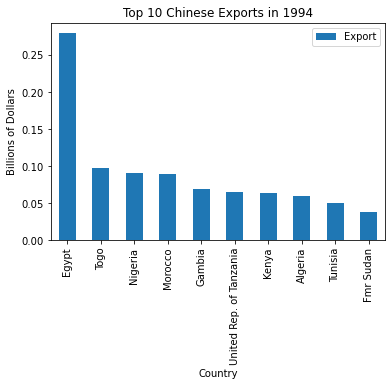

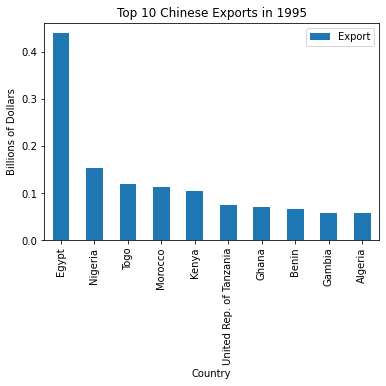

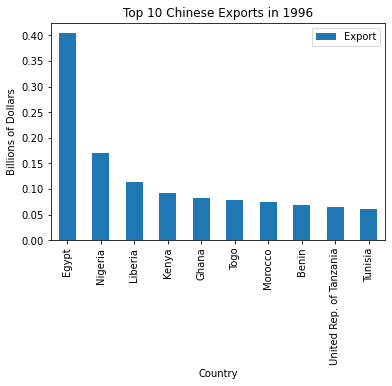

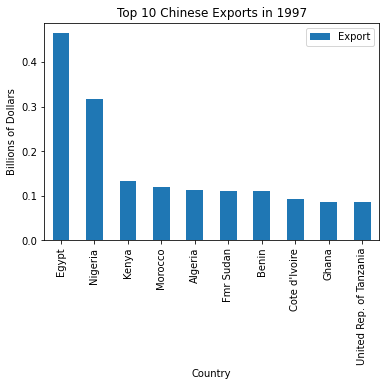

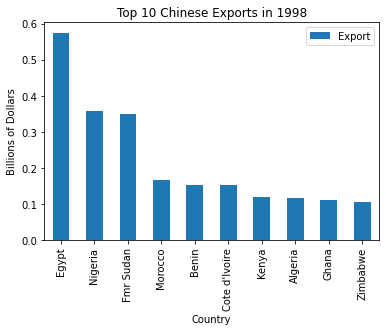

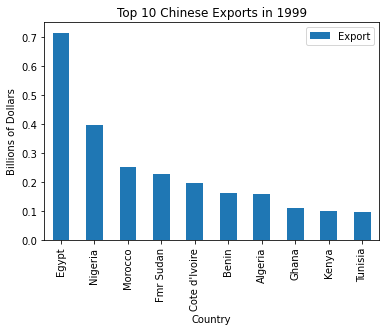

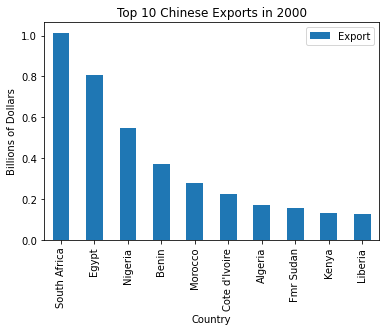

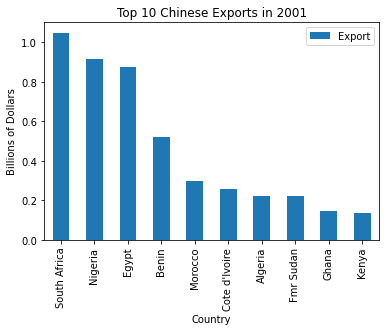

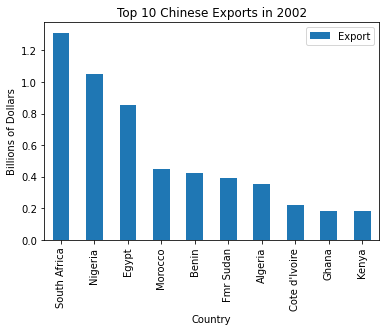

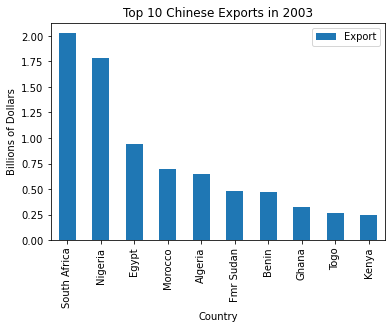

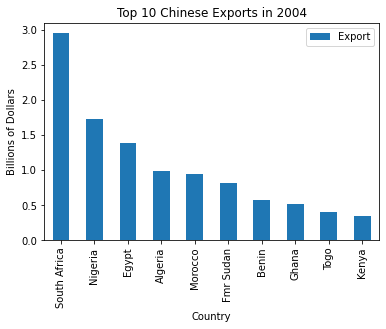

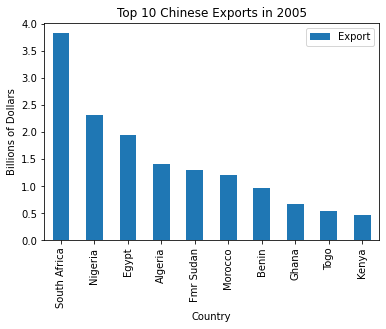

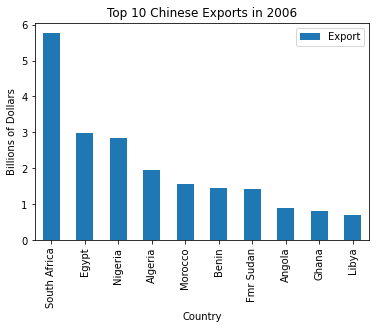

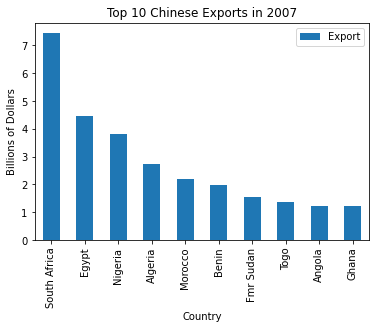

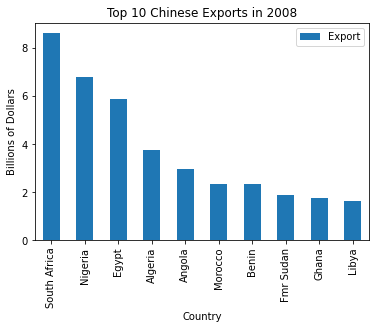

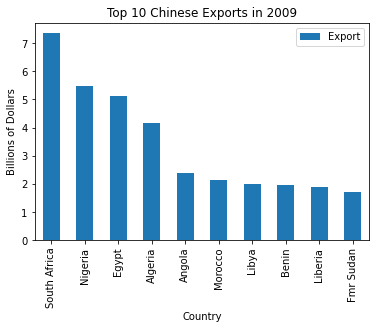

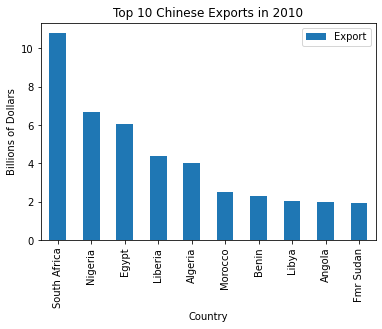

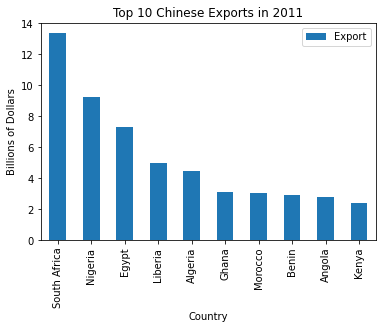

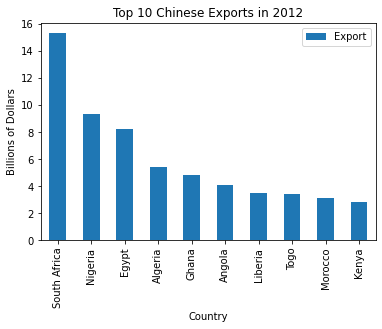

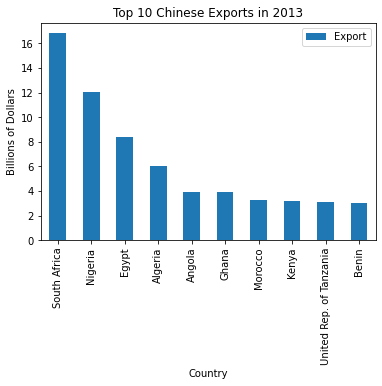

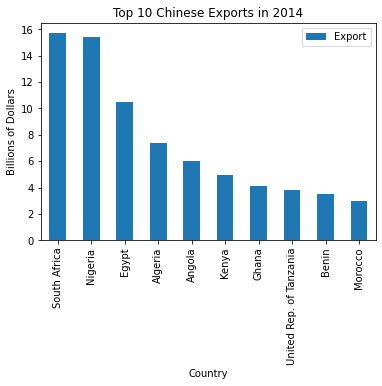

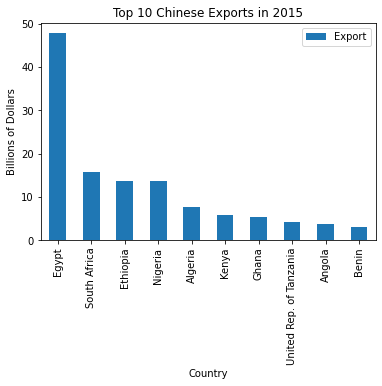

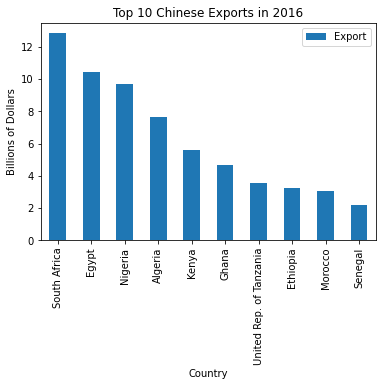

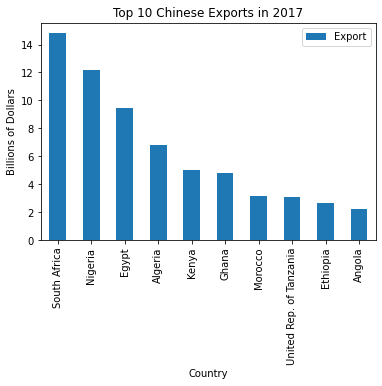

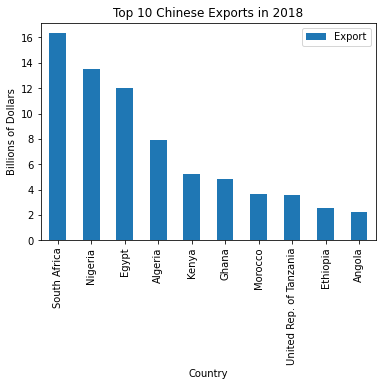

Wall time: 5.84 s


In [41]:
%%time 
#check for execution time
for i in range(1992,2019):
    #creates dataframe for each year
    top_export = ZH_Exp[ZH_Exp['Year'] == i].sort_values('Export', ascending = False).head(10)
    top_export.plot(kind="bar", x='Country', y='Export', title = 'Top 10 Chinese Exports in {}'.format(str(i)))
    plt.ylabel('Billions of Dollars')
    plt.xlabel('Country')
    plt.show()

In [42]:
'''# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in df.head(1200).groupby("Country"):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:'''

'# We can ask for ALL THE AXES and put them into axes\nfig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))\naxes_list = [item for sublist in axes for item in sublist] \n\nfor countryname, selection in df.head(1200).groupby("Country"):\n    ax = axes_list.pop(0)\n    selection.plot(x=\'Year\', y=\'GDP_per_capita\', label=countryname, ax=ax, legend=False)\n    ax.set_title(countryname)\n    ax.tick_params(\n        which=\'both\',\n        bottom=\'off\',\n        left=\'off\',\n        right=\'off\',\n        top=\'off\'\n    )\n    ax.spines[\'left\'].set_visible(False)\n    ax.spines[\'top\'].set_visible(False)\n    ax.spines[\'right\'].set_visible(False)\n\n# Now use the matplotlib .remove() method to \n# delete anything we didn\'t use\nfor ax in axes_list:'

In [43]:
%%time 
'''#check for execution time
for i in range(1992,2019):
    top_export = ZH_Exp[ZH_Exp['Year'] == i].sort_values('Export', ascending = False).head(10)
    display(top_export)'''

Wall time: 0 ns


"#check for execution time\nfor i in range(1992,2019):\n    top_export = ZH_Exp[ZH_Exp['Year'] == i].sort_values('Export', ascending = False).head(10)\n    display(top_export)"

In [44]:
ZH_Exp.set_index('Year')
t = ZH_Exp.groupby('Year')['Export']


In [45]:
ZH_Exp_Pivot.head(5)

Country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,...,South Sudan,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,Year_Total,Percentage Change
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.027338,0.008473,0.022190,0.0,0.002500,0.003601,0.000161,0.009591,0.000161,0.000624,...,0.0,0.0,0.075323,0.028495,0.007097,0.107981,0.005372,0.027430,1.257614,0.000000
1993,0.033538,0.011207,0.053613,0.0,0.009382,0.003711,0.000755,0.006415,0.003217,0.000186,...,0.0,0.0,0.108965,0.028401,0.006235,0.039508,0.007210,0.008746,1.249943,-0.609953
1994,0.059800,0.012482,0.030440,0.0,0.000984,0.002643,0.000424,0.005425,0.000199,0.001415,...,0.0,0.0,0.097346,0.050498,0.008725,0.065598,0.009698,0.021635,1.348419,7.878406
1995,0.057494,0.021159,0.066516,0.0,0.001579,0.002122,0.000380,0.010118,0.000984,0.002377,...,0.0,0.0,0.119797,0.036270,0.012838,0.074111,0.019647,0.015285,1.820920,35.041108
1996,0.054497,0.028534,0.069882,0.0,0.000771,0.000913,0.000275,0.010902,0.002277,0.001167,...,0.0,0.0,0.078571,0.060645,0.007953,0.064154,0.009710,0.018845,1.843160,1.221362


#### Chinese Exports 1992- 2018 

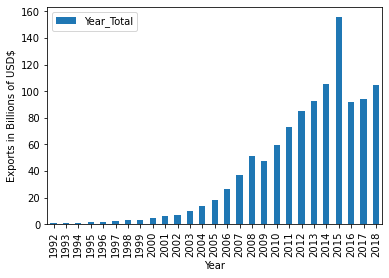

In [46]:
ZH_Exp_Pivot.reset_index().plot(kind='bar', x='Year', y='Year_Total')
plt.ylabel('Exports in Billions of USD$')
plt.show()

### Chinese Imports 

In [47]:
ZH_avg_imp= ZH_Imp.groupby('Country')['Import'].mean().sort_values(ascending= False).head(10)
display(ZH_avg_imp)

Country
Angola                    11.129069
South Africa               3.852016
Congo                      2.072695
Fmr Sudan                  1.562286
Libya                      1.259385
Dem. Rep. of the Congo     1.197528
Zambia                     1.057598
Equatorial Guinea          1.005636
Gabon                      0.741470
Nigeria                    0.666544
Name: Import, dtype: float64

In [48]:
x = ZH_Imp['Year'].unique()

In [49]:
x 

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018], dtype=int64)

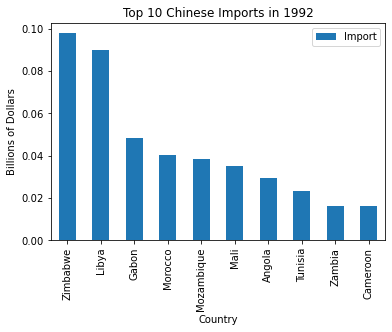

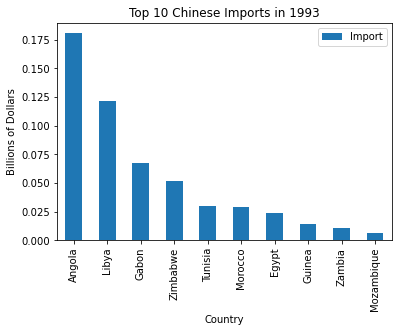

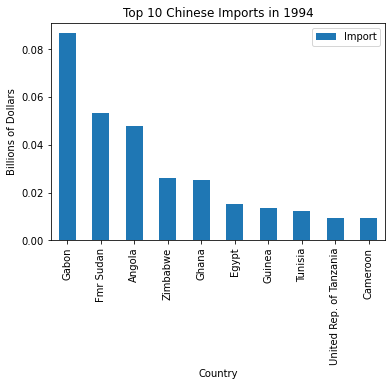

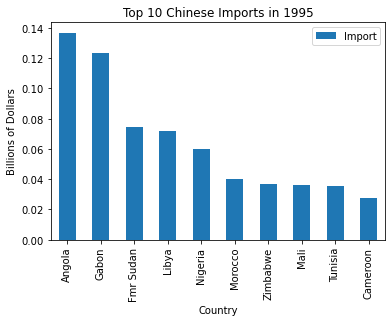

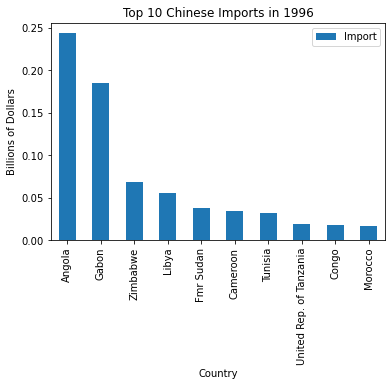

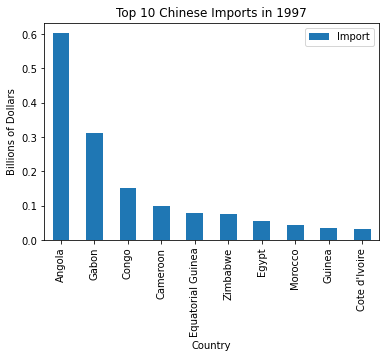

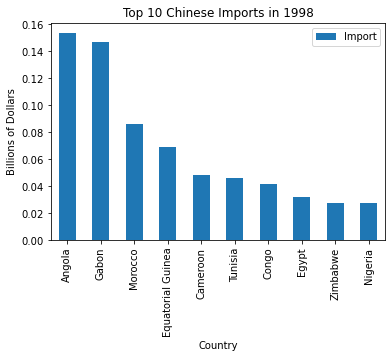

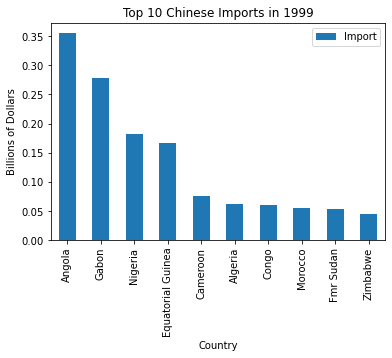

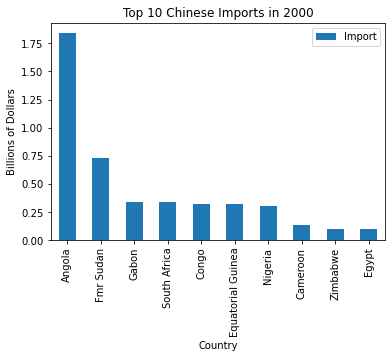

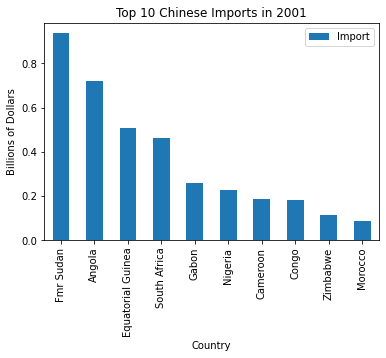

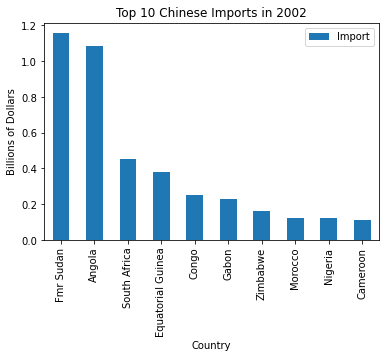

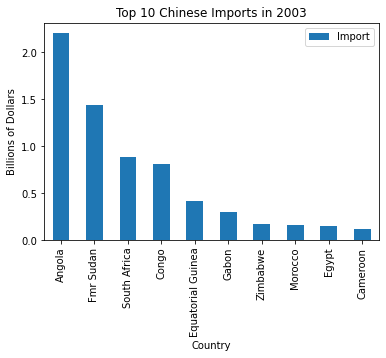

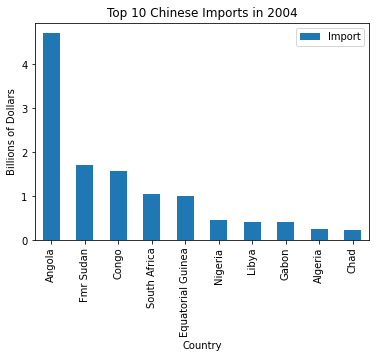

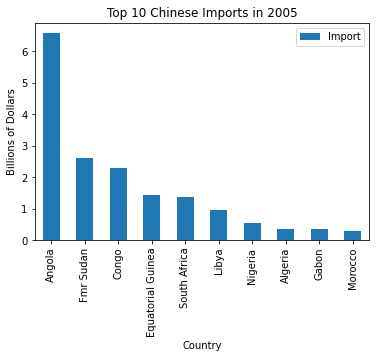

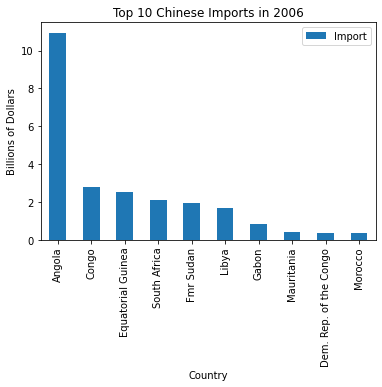

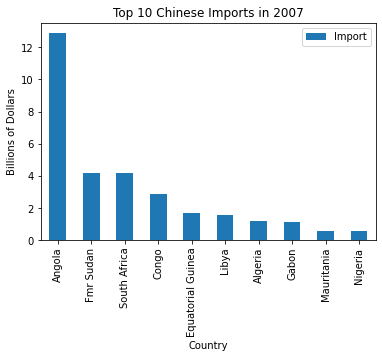

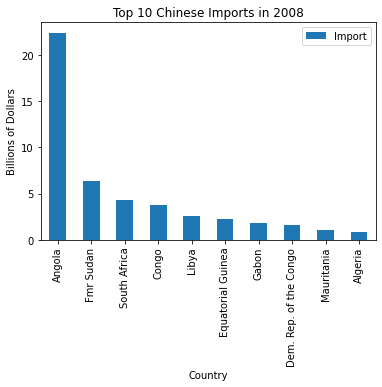

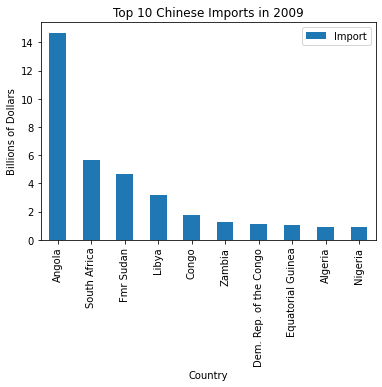

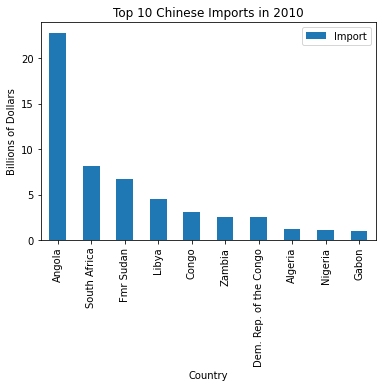

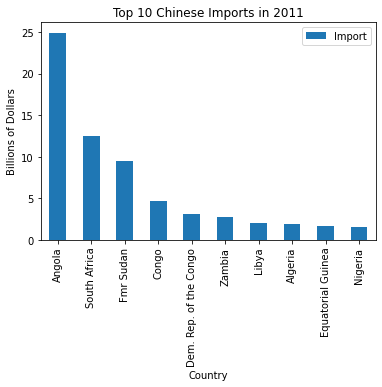

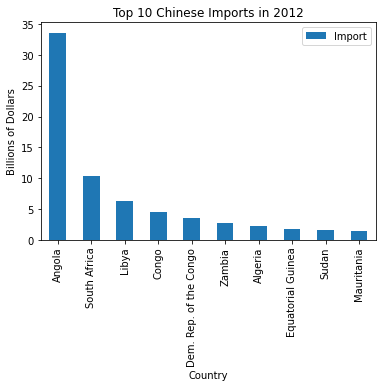

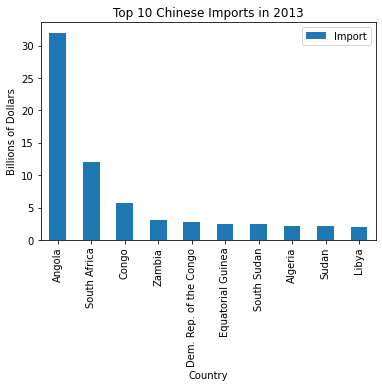

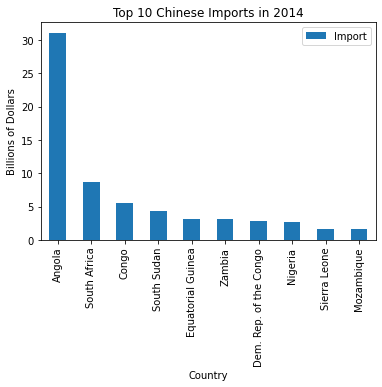

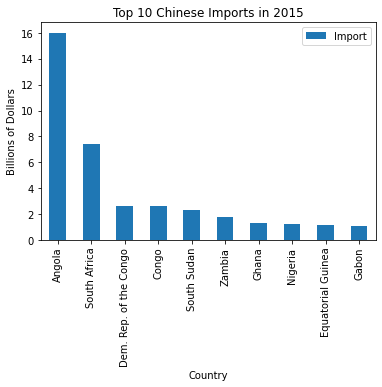

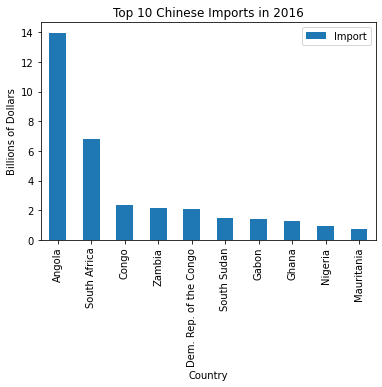

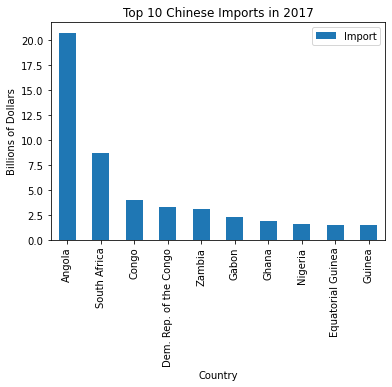

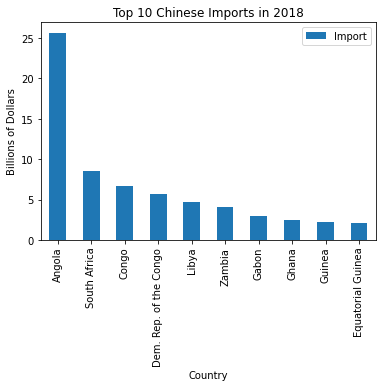

In [50]:
for i in range(1992,2019):
    #creates dataframe for each year
    top_import = ZH_Imp[ZH_Imp['Year'] == i].sort_values('Import', ascending = False).head(10)
    top_import.plot(kind="bar", x='Country', y='Import', title = 'Top 10 Chinese Imports in {}'.format(str(i)))
    plt.ylabel('Billions of Dollars')
    plt.xlabel('Country')
    plt.show()

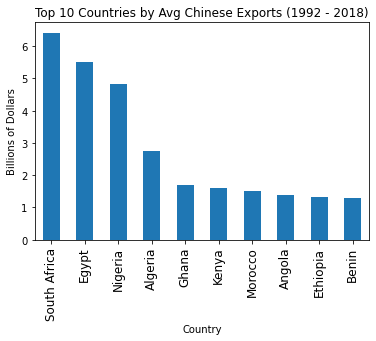

<Figure size 576x1080 with 0 Axes>

In [51]:
ZH_avg_exp.plot(kind="bar", title = 'Top 10 Countries by Avg Chinese Exports (1992 - 2018)')
plt.ylabel('Billions of Dollars')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.figure(figsize=(8,15))
plt.show()

### Total Chinese Investment in Africa

In [52]:
ZH_Exp

,Year,Country,Export,Region
0,1992,Algeria,0.027338,North Africa
1,1993,Algeria,0.033538,North Africa
2,1994,Algeria,0.059800,North Africa
3,1995,Algeria,0.057494,North Africa
4,1996,Algeria,0.054497,North Africa
...,...,...,...,...
1453,2014,Zimbabwe,0.403801,East Africa
1454,2015,Zimbabwe,0.543323,East Africa
1455,2016,Zimbabwe,0.387485,East Africa
1456,2017,Zimbabwe,0.443819,East Africa


In [53]:
ZH_imports = ZH_Imp_Pivot.loc[:, 'Year_Total']
ZH_exports = ZH_Exp_Pivot.loc[:, 'Year_Total']
year = ZH_Exp_Pivot.reset_index().loc[:, 'Year']


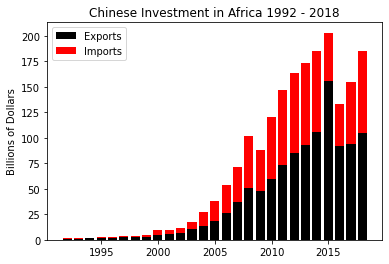

In [54]:
fig, ax = plt.subplots()

ax.bar(year, ZH_exports,  label='Exports', color = 'black')
ax.bar(year, ZH_imports,  bottom=ZH_exports, label='Imports', color = 'red')

ax.set_ylabel('Billions of Dollars')
ax.set_title('Chinese Investment in Africa 1992 - 2018')
ax.legend()

plt.show()

In [66]:
import altair as alt
from vega_datasets import data

In [68]:
ZH_exp_per = ZH_Exp_Pivot['Percentage Change']
ZH_imp_per = ZH_Imp_Pivot['Percentage Change']


## US Import and Export Data

In [69]:
US_avg_exp = US_Exp.groupby('Country')['Export'].mean().sort_values(ascending= False).head(10)

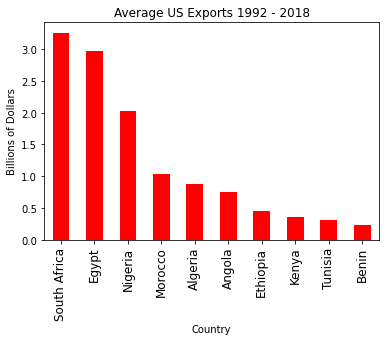

<Figure size 576x1080 with 0 Axes>

In [70]:
US_avg_exp.plot(kind="bar", title = 'Average US Exports 1992 - 2018', color = 'red')
plt.ylabel('Billions of Dollars')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.figure(figsize=(8,15))
plt.show()

In [71]:
US_avg_imp = US_Imp.groupby('Country')['Import'].mean().sort_values(ascending= False).head(10)

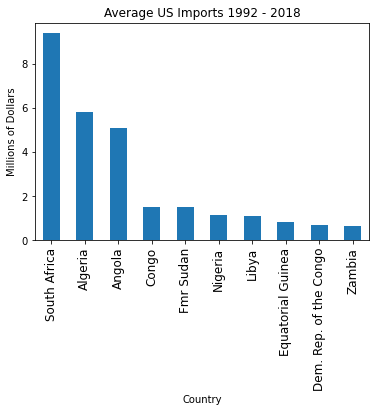

<Figure size 576x1080 with 0 Axes>

In [72]:
US_avg_imp.plot(kind="bar", title = 'Average US Imports 1992 - 2018')
plt.ylabel('Millions of Dollars')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.figure(figsize=(8,15))
plt.show()

In [73]:
US_imports = US_Imp_Pivot.loc[:, 'Year_Total']
US_exports = US_Exp_Pivot.loc[:, 'Year_Total']
year = US_Exp_Pivot.reset_index().loc[:, 'Year']

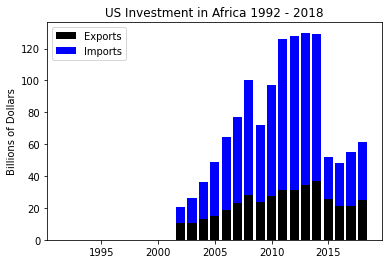

In [74]:
fig, ax = plt.subplots()

ax.bar(year, US_exports,  label='Exports', color = 'black')
ax.bar(year, US_imports,  bottom=US_exports, label='Imports', color = 'blue')

ax.set_ylabel('Billions of Dollars')
ax.set_title('US Investment in Africa 1992 - 2018')
ax.legend()

plt.show()

In [75]:
ZH_Exp_Pivot.reset_index().describe()

Country,Year,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,...,South Sudan,Sudan,Togo,Tunisia,Uganda,United Rep. of Tanzania,Zambia,Zimbabwe,Year_Total,Percentage Change
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2005.000000,2.750701,1.375203,1.289730,0.116018,0.048033,0.018933,0.022170,0.523219,0.007062,...,0.018748,0.560608,0.966447,0.557950,0.224217,1.146864,0.253551,0.186746,40.838929,19.857564
std,7.937254,2.930693,1.664715,1.146735,0.145184,0.061564,0.019307,0.025749,0.671423,0.006889,...,0.037536,0.970542,0.985760,0.536233,0.262819,1.440469,0.305330,0.179364,44.416360,21.105893
min,1992.000000,0.027338,0.008473,0.022190,0.000000,0.000771,0.000387,0.000161,0.005425,0.000161,...,0.000000,0.000000,0.059081,0.028401,0.006235,0.039508,0.005372,0.008746,1.249943,-40.920214
25%,1998.500000,0.138369,0.031432,0.158186,0.000000,0.003509,0.002435,0.001900,0.019520,0.000996,...,0.000000,0.000000,0.103049,0.090350,0.011808,0.085322,0.020882,0.029220,3.165232,5.306060
50%,2005.000000,1.404420,0.372794,0.952952,0.058513,0.016135,0.010179,0.005188,0.129873,0.003324,...,0.000000,0.000000,0.538095,0.295537,0.079366,0.303582,0.051042,0.125370,18.602937,19.026099
75%,2011.500000,4.944270,2.321707,2.212181,0.179135,0.064062,0.038496,0.045986,0.969214,0.012847,...,0.017156,0.942386,1.858878,1.174251,0.405797,1.871677,0.520991,0.395643,79.026533,35.549678
max,2018.000000,7.923382,5.975307,3.485979,0.616162,0.223341,0.051602,0.078050,1.877425,0.022857,...,0.155445,2.398432,3.383142,1.415924,0.823682,4.278865,0.969452,0.543323,155.695569,56.502390


## Change in China-Africa Exports and Imports 1992 -2018

In [76]:
import altair as alt 
from vega_datasets import data

In [77]:
x_exp_year = ZH_Exp_Pivot.reset_index().loc[:,'Year']
y_exp_percent =  ZH_Exp_Pivot.reset_index().loc[:, 'Percentage Change']



In [78]:
df = pd.DataFrame({
    'year': x_exp_year,
    'export_percentage_change': round(y_exp_percent, 2)
})

alt.Chart(df).mark_bar().encode(
    x='year:O',
    y='export_percentage_change:Q',
    tooltip = [alt.Tooltip('year:O'),
               alt.Tooltip('export_percentage_change:Q')
              ],
    color=alt.condition(
        alt.datum.export_percentage_change < 0,  # Sets a condition if percentage change is negative
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
        )
).properties( #adds a title 
    title='TTs 1992 -2018'
).interactive()

alt.Chart(...)

In [79]:
x_imp_year = ZH_Imp_Pivot.reset_index().loc[:,'Year']
y_imp_percent =  ZH_Imp_Pivot.reset_index().loc[:, 'Percentage Change']


In [80]:
df2 = pd.DataFrame({
    'year': x_imp_year,
    'export_percentage_change': round(y_imp_percent, 2)
})

alt.Chart(df).mark_bar().encode(
    x='year:O',
    y='export_percentage_change:Q',
    tooltip = [alt.Tooltip('year:O'),
               alt.Tooltip('export_percentage_change:Q')
              ],
    color=alt.condition(
        alt.datum.export_percentage_change < 0,  # If the year is 1810 this test returns True,
        alt.value('red'),     # which sets the bar red.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
        )
).interactive().properties( #adds a title 
    title='Change in China-Africa Imports 1992 -2018'
    )

alt.Chart(...)

## Change in US-Africa Exports and Imports 1992 -2018

In [81]:
x_exp_year_us = US_Exp_Pivot.reset_index().loc[:,'Year']
y_exp_percent_us =  US_Exp_Pivot.reset_index().loc[:, 'Percentage Change']


In [82]:
usf = pd.DataFrame({
    'year': x_exp_year_us,
    'export_percentage_change': round(y_exp_percent_us, 2)
})

alt.Chart(df).mark_bar().encode(
    x='year:O',
    y='export_percentage_change:Q',
    tooltip = [alt.Tooltip('year:O'),
               alt.Tooltip('export_percentage_change:Q')
              ],
    color=alt.condition(
        alt.datum.export_percentage_change < 0,  # If the year is 1810 this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
).interactive().properties( #adds a title 
    title='Change in US-Africa Exports 1992 -2018')

alt.Chart(...)

In [83]:
x_imp_year_us = US_Imp_Pivot.reset_index().loc[:,'Year']
y_imp_percent_us =  US_Imp_Pivot.reset_index().loc[:, 'Percentage Change']


In [84]:
df = pd.DataFrame({
    'year': x_imp_year_us,
    'export_percentage_change': round(y_imp_percent_us, 2)
})

alt.Chart(df).mark_bar().encode(
    x='year:O',
    y='export_percentage_change:Q',
    tooltip = [alt.Tooltip('year:O'),
               alt.Tooltip('export_percentage_change:Q')
              ],
    color=alt.condition(
        alt.datum.export_percentage_change < 0,  # If the year is 1810 this test returns True,
        alt.value('red'),     # which sets the bar red.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
).interactive().properties( #adds a title 
    title='Change in US-Africa Imports 1992 -2018')

alt.Chart(...)

In [85]:
# Merge Chinese Import and Export Data

ZH_trade_balance = pd.merge(ZH_Exp, ZH_Imp, on=["Year", "Country", 'Region'])
display(ZH_trade_balance.head())
display(ZH_trade_balance.shape)


,Year,Country,Export,Region,Import
0,1992,Algeria,0.027338,North Africa,0.002696
1,1993,Algeria,0.033538,North Africa,0.006648
2,1994,Algeria,0.059800,North Africa,0.003769
3,1995,Algeria,0.057494,North Africa,0.022027
4,1996,Algeria,0.054497,North Africa,0.000011


(1458, 5)

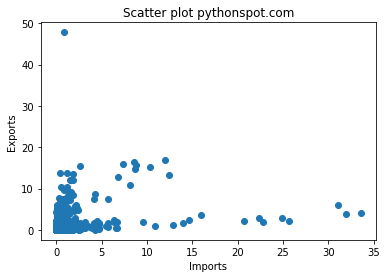

In [86]:
Import_ZH= ZH_trade_balance['Import']
Export_ZH= ZH_trade_balance['Export']

plt.scatter(Import_ZH, Export_ZH)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

In [87]:
# Merge US Import and Export Data 

US_trade_balance = pd.merge(US_Exp, US_Imp, on=["Year", "Country", 'Region'])
display(ZH_trade_balance.head())
display(ZH_trade_balance.shape)

,Year,Country,Export,Region,Import
0,1992,Algeria,0.027338,North Africa,0.002696
1,1993,Algeria,0.033538,North Africa,0.006648
2,1994,Algeria,0.059800,North Africa,0.003769
3,1995,Algeria,0.057494,North Africa,0.022027
4,1996,Algeria,0.054497,North Africa,0.000011


(1458, 5)

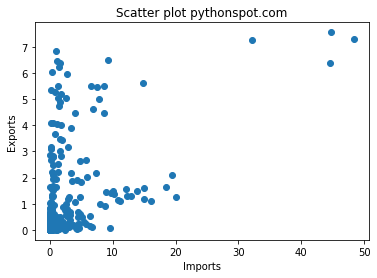

In [88]:
Import_US= US_trade_balance['Import']
Export_US= US_trade_balance['Export']

plt.scatter(Import_US, Export_US)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

# Export CSVs

In [93]:
chinese_list = [ZH_Exp, ZH_Imp, ZH_Exp_Pivot, ZH_Imp_Pivot]
us_list = [US_Exp, US_Imp, US_Exp_Pivot, US_Imp_Pivot]

In [99]:
ZH_Exp.to_csv('ZH_Export_Classfied.csv')
ZH_Imp.to_csv('ZH_Import_Classfied.csv')
ZH_Exp_Pivot.to_csv('ZH_Export_Pivot.csv')
ZH_Imp_Pivot.to_csv('ZH_Import_Pivot.csv')

In [100]:
US_Exp.to_csv('US_Export_Classfied.csv')
US_Imp.to_csv('US_Import_Classfied.csv')
US_Exp_Pivot.to_csv('US_Export_Pivot.csv')
US_Imp_Pivot.to_csv('US_Import_Pivot.csv')

# Prediction

## Join Data Frames

In [101]:
ZH_Imp

,Year,Country,Import,Region
0,1992,Algeria,0.002696,North Africa
1,1993,Algeria,0.006648,North Africa
2,1994,Algeria,0.003769,North Africa
3,1995,Algeria,0.022027,North Africa
4,1996,Algeria,0.000011,North Africa
...,...,...,...,...
1453,2014,Zimbabwe,0.836633,East Africa
1454,2015,Zimbabwe,0.761401,East Africa
1455,2016,Zimbabwe,0.726880,East Africa
1456,2017,Zimbabwe,0.872030,East Africa


In [106]:
ZH_Total = pd.merge(ZH_Exp, ZH_Imp, left_on=["Year", 'Country', 'Region'], right_on=["Year", 'Country', 'Region'])

## Dummy Variables

In [107]:
dummies = pd.get_dummies(ZH_Total.Region)
dummies

,East Africa,Middle Africa,None,North Africa,South Africa,West Africa
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1453,1,0,0,0,0,0
1454,1,0,0,0,0,0
1455,1,0,0,0,0,0
1456,1,0,0,0,0,0


In [108]:
merged = pd.concat([ZH_Total,dummies],axis='columns')
merged

,Year,Country,Export,Region,Import,East Africa,Middle Africa,None,North Africa,South Africa,West Africa
0,1992,Algeria,0.027338,North Africa,0.002696,0,0,0,1,0,0
1,1993,Algeria,0.033538,North Africa,0.006648,0,0,0,1,0,0
2,1994,Algeria,0.059800,North Africa,0.003769,0,0,0,1,0,0
3,1995,Algeria,0.057494,North Africa,0.022027,0,0,0,1,0,0
4,1996,Algeria,0.054497,North Africa,0.000011,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1453,2014,Zimbabwe,0.403801,East Africa,0.836633,1,0,0,0,0,0
1454,2015,Zimbabwe,0.543323,East Africa,0.761401,1,0,0,0,0,0
1455,2016,Zimbabwe,0.387485,East Africa,0.726880,1,0,0,0,0,0
1456,2017,Zimbabwe,0.443819,East Africa,0.872030,1,0,0,0,0,0


In [109]:
_ZH_ = merged.drop(['Region'], axis='columns')
_ZH_

,Year,Country,Export,Import,East Africa,Middle Africa,None,North Africa,South Africa,West Africa
0,1992,Algeria,0.027338,0.002696,0,0,0,1,0,0
1,1993,Algeria,0.033538,0.006648,0,0,0,1,0,0
2,1994,Algeria,0.059800,0.003769,0,0,0,1,0,0
3,1995,Algeria,0.057494,0.022027,0,0,0,1,0,0
4,1996,Algeria,0.054497,0.000011,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1453,2014,Zimbabwe,0.403801,0.836633,1,0,0,0,0,0
1454,2015,Zimbabwe,0.543323,0.761401,1,0,0,0,0,0
1455,2016,Zimbabwe,0.387485,0.726880,1,0,0,0,0,0
1456,2017,Zimbabwe,0.443819,0.872030,1,0,0,0,0,0


In [111]:
_ZH_final = _ZH_.drop(['None'], axis='columns')
_ZH_final

,Year,Country,Export,Import,East Africa,Middle Africa,North Africa,South Africa,West Africa
0,1992,Algeria,0.027338,0.002696,0,0,1,0,0
1,1993,Algeria,0.033538,0.006648,0,0,1,0,0
2,1994,Algeria,0.059800,0.003769,0,0,1,0,0
3,1995,Algeria,0.057494,0.022027,0,0,1,0,0
4,1996,Algeria,0.054497,0.000011,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1453,2014,Zimbabwe,0.403801,0.836633,1,0,0,0,0
1454,2015,Zimbabwe,0.543323,0.761401,1,0,0,0,0
1455,2016,Zimbabwe,0.387485,0.726880,1,0,0,0,0
1456,2017,Zimbabwe,0.443819,0.872030,1,0,0,0,0


In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [112]:
X = _ZH_final.drop('Export', axis='columns')
X

,Year,Country,Import,East Africa,Middle Africa,North Africa,South Africa,West Africa
0,1992,Algeria,0.002696,0,0,1,0,0
1,1993,Algeria,0.006648,0,0,1,0,0
2,1994,Algeria,0.003769,0,0,1,0,0
3,1995,Algeria,0.022027,0,0,1,0,0
4,1996,Algeria,0.000011,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1453,2014,Zimbabwe,0.836633,1,0,0,0,0
1454,2015,Zimbabwe,0.761401,1,0,0,0,0
1455,2016,Zimbabwe,0.726880,1,0,0,0,0
1456,2017,Zimbabwe,0.872030,1,0,0,0,0


In [114]:
y = _ZH_final.Export
y

0       0.027338
1       0.033538
2       0.059800
3       0.057494
4       0.054497
          ...   
1453    0.403801
1454    0.543323
1455    0.387485
1456    0.443819
1457    0.446070
Name: Export, Length: 1458, dtype: float64